<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/Reinforcement%20Learning/BanditIllustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Armed Bandit Illustration

In this example, we will illustrate simple algorithms for multi-armed bandits in a canonical (made-up) example.

We will consider a scenario where we have 10 different options we need to choose between. The payoff for each option at each time step will be generated by a normal random variable with variance 1 and a different mean reward. We will consider performance by making 1000 sequential choices among the actions.

We will consider the performance of different algorithms in this setting by simulating performance across 2000 different settings where the mean reward for each action in each setting is a different (randomly) generated mean reward.  

# Python Libraries

As usual, we'll start by importing the libraries we will use.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

We now define the functions that make up our simulation.



*   `Bandit`: Creates the reward structure for a given setting
*   `EpsilonGreedyAgent`: Defines the $\epsilon$-greedy algorithm for action choice
*   `UCB_Agent`: Defines the upper confidence bound (UCB) algorithm for action choice
*   `ThompsonSamplingAgent`: Defines the Thompson Sampling algorithm for action choice
*   `run_experiment`: Runs one instance of the experiment
*   `plot_results`: A wrapper function that runs all the experiments, tabulates, and displays the results

The **$\epsilon$-greedy algorithm** is a simple random algorithm that


*   encourages *exploration* by choosing a random action with probability $\epsilon$
*   encourages *exploitation* by choosing the best current action with probability 1-$\epsilon$


Here, we're using a variant of the **UCB algorithm** that incorporates the estimated variance of each action at each time by choosing the action at time $t+1$ that maximizes

\begin{align*}
UCB_j(t) = \bar{X}_{j,t} + 2\sqrt{\frac{s^2_{j,t}\ln(t)}{N_{j,t}}}
\end{align*}


*   $\bar{X}_{j,t}$ is the average reward of action $j$ at time $t$
*   $s^2_{j,t}$ is the variance of the reward of action $j$ at time $t$
*   $N_{j,t}$ is the number of times action $j$ has been taken at time $t$

**Thompson Sampling** is a more sophisticated probabilistic algorithm based on Bayesian updating. We're including it here as a point of comparison and for fun. If you want to understand what it's doing, paste the code block into your favorite LLM and ask it to explain the code to you. 😁

**------self note------**

### **Thompson Sampling:**

**The Core Idea: Probability Matching**

Imagine you have several options (like different slot machines, website ad designs, or drug treatments), and each option has an unknown probability of success. You want to figure out which option is the best one to choose over time to maximize your total rewards.

Thompson Sampling works by:

* 1) Beliefs as Probability Distributions: For each option (arm of bandit), algorithm maintains a probability distribution of its current belief about that option's true success rate. For example, for a slot machine, it might believe the payout probability is likely around 20%, but it could also be 15% or 25%. This distribution captures the uncertainty.

  * Commonly, **Beta distributions** are used for success/failure (**Bernoulli**) outcomes, as they are conjugate to the **Bernoulli** likelihood, making updates easy.
  
  The Bernouli Sitribution:
$$P(X=k)=p^k(1−p)^{(1−k)}$$
  Beta Distribution:
$$F(x;α,β)= \frac{x^{α-1}(1-x)^{β-1}}{B(α,β)}$$
$$B(α,β)=∫_0^1 t^{α−1} (1−t)^{β−1} dt$$
* Sampling from Beliefs to Act: In each round, to decide which option to choose, Thompson Sampling does something elegant:
  * It draws a random sample from each option's current probability distribution.
  * It then picks the option whose sample had the highest value.
* Updating Beliefs with Observed Outcomes: After choosing an option and observing the outcome (e.g., a win or a loss, a click or no click), the algorithm updates the probability distribution for the chosen option.
  * If the chosen option was successful, the distribution is updated to make higher success rates more likely.
  * If it failed, the distribution is updated to make lower success rates more likely.
  * This is typically done using **Bayesian** updating. For example, with Beta distributions, if you observe a success, you increment the 'alpha' parameter; if you observe a failure, you increment the 'beta' parameter.
  
**How Thompson Sampling Balances Exploration and Exploitation**:

The exploration-exploitation dilemma is about choosing between trying out options you're uncertain about (exploration) to learn more, versus picking the option you currently think is best (exploitation) to get immediate rewards.

Thompson Sampling balances this naturally:

* Exploitation: If an option has consistently performed well, its probability distribution will become more concentrated around a high success rate. This means samples drawn from its distribution are very likely to be high, so the algorithm will tend to exploit this good option.
* Exploration: If an option has a very uncertain success rate (its probability distribution is wide and flat), there's a decent chance that a random sample from its distribution could be higher than samples from other, seemingly better but more certain, options. This encourages the algorithm to try out these uncertain options to learn more about them.
  * Options that haven't been tried much will have wider distributions, increasing their chance of being selected for exploration.

Essentially, an option is chosen in proportion to the probability that it is the optimal option. This is why it's sometimes called "probability matching."

**Analogy: Choosing a Restaurant**

Imagine you're new to a town and want to find the best restaurant for dinner each night.

* Your Beliefs: For each restaurant, you have a mental idea (a distribution) of how good it might be. Initially, these beliefs are vague (wide distributions).
* Thompson Sampling Step: Each night, instead of just going to the restaurant you think is probably the best, you "imagine" a specific level of enjoyment you might get from each restaurant by taking a random sample from your belief distribution for each. You then go to the restaurant that "imagined" best for that night.
* Updating: After eating, you update your belief about that specific restaurant. If it was great, your belief distribution for it shifts towards "great." If it was terrible, it shifts towards "terrible."

Over time, you'll naturally try different places (exploration) but will also increasingly frequent the ones that have consistently proven to be good (exploitation).

**Key Steps Summarized**:

1. Initialization: For each arm/option, define an initial probability distribution for its reward (e.g., a Beta(1,1) distribution, which is a uniform distribution, if you have no prior knowledge).
2. Sampling: In each round, draw one sample from each arm's current distribution.
3. Selection: Choose the arm that produced the highest sample in step 2.
4. Observation: Play the selected arm and observe the reward.
5. Update: Update the parameters of the distribution for the arm you just played based on the observed reward.
6. Repeat: Go back to step 2.

**Advantages**:

* Effective Exploration-Exploitation
* Computationally Efficient
* Easy to Implement

**Disadvantages**:

* Can be Slower to Converge to the Absolute Best Arm, comparing to some algorithms that are more aggressively exploitative later on (like UCB with carefully tuned parameters), Thompson Sampling might continue exploring a bit more.
* Requires Priors: You need to define initial probability distributions. A poorly chosen prior could slow down learning initially.

**Applications**:

Thompson Sampling is widely used in:

* A/B Testing and Multi-Armed Bandit Problems: Optimizing website layouts, ad placements, headlines, product recommendations.
* Clinical Trials: Adapting treatment assignments to patients based on observed efficacy.
* Personalized Recommendations: Choosing which items to recommend to a user.
* Resource Allocation: Deciding how to allocate limited resources among competing options.


In [ ]:
class Bandit: # define multi-arm bandit environment
    """Class representing a 10-armed bandit with fixed stochastic rewards"""
    def __init__(self, k=10, steps=1000, seed=None): # (self, k arms, 1000 steps, random seed for numpy ensure reproductivity)
        # Set random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)

        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # True action values, choose q_true from random normal distribution for each of the k arms
        self.optimal_action = np.argmax(self.q_true) # find arm with hiest q_true

        # Precompute all rewards for each action and step
        # For each arm a, rewards R_t(a) at each step t are drawn from a normal distribution with
        # mean of self.q_true[a] (the true mean reward of arm a) and a standard deviation of 1.
        self.rewards = np.random.normal(self.q_true[:, None], 1, (k, steps))

    def get_reward(self, action, step): # method returns reward for an action at a step
        """Returns the precomputed reward for a given action and step"""
        return self.rewards[action, step]

# Implements ε-greedy algorithm.
# The agent either "explores" (random action) with probability ε, or
# "exploits" (its currently belived best action) with probability 1-ε.
class EpsilonGreedyAgent:
    """Epsilon-Greedy agent that ensures each arm is pulled at least once."""
    def __init__(self, k=10, epsilon=0.1, initial_draws=False):
        self.k = k
        self.epsilon = epsilon
        self.q_est = np.zeros(k)  # An array with k Estimated values of mean rewards for k arm, initialized as 0
        self.action_counts = np.zeros(k)  # Count of times each action is taken for k arms
        self.initial_draws = initial_draws  # Whether to force each arm to be drawn once
        self.initial_pulls = set() if initial_draws else None # Track which actions have been taken

    def select_action(self):
        """Selects an action using ε-greedy policy, ensuring each arm is pulled at least once."""
        # Force each arm to be taken at least once
        if self.initial_draws and len(self.initial_pulls) < self.k: # When initial_draw is true AND initial_pull < k, force an arm
            action = len(self.initial_pulls)  # Pick the next untried arm
            self.initial_pulls.add(action)
            return action

        # Follow epsilon-greedy policy after each arm has been pulled at least once
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k) # choose one of k arms randomly
        return np.argmax(self.q_est) # choose best arm known by q_est

    def update(self, action, reward):
        """Updates estimates using incremental formula"""
        self.action_counts[action] += 1
        self.q_est[action] += (reward - self.q_est[action]) / self.action_counts[action] # move q_est fractionally towards new reward

# Implements Upper Confidence Bound (UCB) algorithm.
# UCB agent select actions based on an optimistic estimate of their potential, while
# balancing exploitation of known good arms with exploration of less certain arms.
class UCB_Agent:
    """UCB agent requiring at least two pulls per action and incorporating sample variance."""

    def __init__(self, k=10, c=2): # larger c encourages more exploration
        self.k = k
        self.c = c
        self.q_est = np.zeros(k)  # Sample means
        self.action_counts = np.zeros(k, dtype=int)  # Number of pulls per action
        self.t = 0  # Time step to track total number of actions taken

        # Track rewards for sample variance calculation
        # sample variance S^2 = E[X^2] - (E[x])^2
        self.sum_rewards = np.zeros(k, dtype=np.float64) # this is the Xs
        self.squared_rewards = np.zeros(k, dtype=np.float64) # this is the X^2

    def select_action(self):
        """Selects an action using UCB with sample variance adjustment."""
        self.t += 1

        # Force each action to be taken at least twice before applying UCB formula
        if np.min(self.action_counts) < 2:
            return np.argmin(self.action_counts)  # Pick the least tried action

        # Compute sample means and sample variances
        sample_means = self.q_est
        sample_variances = np.zeros(self.k)

        for action in range(self.k):
            if self.action_counts[action] > 1:
                mean = self.q_est[action]
                squared_mean = self.squared_rewards[action] / self.action_counts[action]
                variance = max(squared_mean - mean**2, 1e-6)  # Ensure nonzero variance
            else:
                variance = 1  # Default to 1 if we don't have enough samples

            sample_variances[action] = variance

        # Compute UCB values incorporating sample variance
        ucb_values = sample_means + self.c * np.sqrt(sample_variances * np.log(self.t) / self.action_counts)

        return np.argmax(ucb_values) # find arm with highest UCB value

    def update(self, action, reward):
        """Updates sample mean and variance estimates."""
        self.action_counts[action] += 1 # Increments pull count.
        n = self.action_counts[action]

        self.sum_rewards[action] += reward # Adds reward to sum for variance calculation.
        self.squared_rewards[action] += reward**2 # Adds squared reward for variance calculation.

        # Update sample mean
        self.q_est[action] += (reward - self.q_est[action]) / n # Updates sample mean (same incremental formula as ε-Greedy).

class ThompsonSamplingAgent:
    """Thompson Sampling agent using Normal-Inverse-Gamma (NIG) conjugate priors."""

    def __init__(self, k=10, mu_0=0, kappa_0=1, alpha_0=1, beta_0=1):
        self.k = k  # Number of arms

        # Prior parameters
        self.mu_0 = np.full(k, mu_0, dtype=np.float64)  # Mean prior
        self.kappa_0 = kappa_0  # Strength of prior on mean
        self.alpha_0 = np.full(k, alpha_0, dtype=np.float64)  # Shape parameter (prior)
        self.beta_0 = np.full(k, beta_0, dtype=np.float64)  # Scale parameter (prior)

        # Posterior parameters (initialize with priors)
        self.kappa_n = np.full(k, kappa_0, dtype=np.float64)
        self.mu_n = np.full(k, mu_0, dtype=np.float64)
        self.alpha_n = np.full(k, alpha_0, dtype=np.float64)
        self.beta_n = np.full(k, beta_0, dtype=np.float64)

        # Track rewards for updating
        self.action_counts = np.zeros(k, dtype=int)  # Number of pulls per arm
        self.sum_rewards = np.zeros(k, dtype=np.float64)  # Sum of observed rewards
        self.squared_rewards = np.zeros(k, dtype=np.float64)  # Sum of squared rewards

    def select_action(self):
        """Selects an action by drawing samples from the posterior distribution."""
        sampled_means = np.zeros(self.k)

        for action in range(self.k):
            sampled_variance = 1 / np.random.gamma(self.alpha_n[action], 1 / self.beta_n[action])
            sampled_means[action] = np.random.normal(self.mu_n[action], np.sqrt(sampled_variance / self.kappa_n[action]))

        return np.argmax(sampled_means)

    def update(self, action, reward):
        """Updates the posterior parameters using conjugate Normal-Inverse-Gamma updates."""
        self.action_counts[action] += 1
        n = self.action_counts[action]

        self.sum_rewards[action] += reward
        self.squared_rewards[action] += reward ** 2

        sample_mean = self.sum_rewards[action] / n

        # Update parameters
        self.kappa_n[action] = self.kappa_0 + n
        self.mu_n[action] = (self.kappa_0 * self.mu_0[action] + n * sample_mean) / self.kappa_n[action]
        self.alpha_n[action] = self.alpha_0[action] + n / 2

        # Compute new beta_n using observed variance
        sum_sq_diff = self.squared_rewards[action] - n * sample_mean**2
        self.beta_n[action] = self.beta_0[action] + 0.5 * (sum_sq_diff + (self.kappa_0 * n / self.kappa_n[action]) * (sample_mean - self.mu_0[action])**2)

def run_experiment(bandit, agent, steps=1000):
    rewards = np.zeros(steps)
    optimal_action_count = np.zeros(steps)
    actions_taken = np.zeros(steps, dtype=int)

    for t in range(steps):
        action = agent.select_action()
        reward = bandit.get_reward(action, t)  # Ensure consistent rewards
        agent.update(action, reward)

        rewards[t] = reward
        actions_taken[t] = action
        if action == bandit.optimal_action:
            optimal_action_count[t] = 1

    if isinstance(agent, ThompsonSamplingAgent):
      estimated_q = agent.mu_n
    else:
      estimated_q = agent.q_est

    return rewards, optimal_action_count, actions_taken, estimated_q


def plot_results(agents, bandit, steps=1000, runs=2000):
    avg_rewards = {name: np.zeros(steps) for name in agents}
    optimal_actions = {name: np.zeros(steps) for name in agents}

    # Storage for MSE calculations
    mse_results = {name: {"mse_optimal": [], "mse_overall": []} for name in agents}

    for _ in range(runs):
        new_bandit = Bandit(steps=steps)
        true_q = new_bandit.q_true
        optimal_action = new_bandit.optimal_action

        for name, agent_factory in agents.items():
            agent = agent_factory()
            rewards, opt_actions, _, estimated_q = run_experiment(new_bandit, agent, steps)

            # Store rewards and optimal action selection counts
            avg_rewards[name] += rewards
            optimal_actions[name] += opt_actions

            # Compute MSE
            mse_optimal = (estimated_q[optimal_action] - true_q[optimal_action]) ** 2
            mse_overall = np.mean((estimated_q - true_q) ** 2)

            mse_results[name]["mse_optimal"].append(mse_optimal)
            mse_results[name]["mse_overall"].append(mse_overall)

    # Average rewards and optimal action percentages over all runs
    for name in agents:
        avg_rewards[name] /= runs
        optimal_actions[name] /= runs

    # Plot Average Rewards
    plt.figure(figsize=(12, 5))
    for name, rewards in avg_rewards.items():
        plt.plot(rewards, label=name)
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.title("10-Armed Bandit: Average Reward")
    plt.show()

    # Plot Optimal Action Percentage
    plt.figure(figsize=(12, 5))
    for name, opt_action in optimal_actions.items():
        plt.plot(opt_action * 100, label=name)
    plt.xlabel("Steps")
    plt.ylabel("Optimal Action %")
    plt.legend()
    plt.title("10-Armed Bandit: Optimal Action %")
    plt.show()

    # Compute final MSE values
    mse_summary = {"Agent": [], "Avg MSE Optimal Action": [], "Avg MSE Overall": []}
    for name in agents:
        mse_summary["Agent"].append(name)
        mse_summary["Avg MSE Optimal Action"].append(np.mean(mse_results[name]["mse_optimal"]))
        mse_summary["Avg MSE Overall"].append(np.mean(mse_results[name]["mse_overall"]))

    # Convert to DataFrame for display
    df_mse_summary = pd.DataFrame(mse_summary)

    print(df_mse_summary)


# Experiments

We start by defining the algorithms we're going to consider:



*   **Completely Random** - $\epsilon$-greedy algorithm with $\epsilon=1$. A random choice will be taken at each step. This algorithm is equivalent to running a randomized controlled trial with 1000 obervations and probability of each treatment equal to .10.
*   **Epsilon-Greedy** - $\epsilon$-greedy algorithm with $\epsilon=0.1$. This setting is often used as a default.
*   **Completely-Greedy** - $\epsilon$-greedy algorithm with $\epsilon=0.1$ Here, we always choose the best option given the current information. We'll see that we tend to get stuck at bad choices because we don't explore enough.
*   **UCB** - UCB algorithm as described above
*   **ThompsonSampling** - Thompson Sampling (the slowest of the bunch)


In [ ]:
# Initialize agents
agents = {
    "Completely Random (ε=1)": lambda: EpsilonGreedyAgent(epsilon=1),
    "Epsilon-Greedy (ε=0.1)": lambda: EpsilonGreedyAgent(epsilon=0.1),
    "Completely Greedy (ε=0)": lambda: EpsilonGreedyAgent(epsilon=0),
    "UCB (c=2)": lambda: UCB_Agent(),
    "Thompson Sampling": lambda: ThompsonSamplingAgent()
}


Before running the full experiment, we're going to look at the outcome of one scenario.

In [ ]:
# Initialize bandit experiment
bandit0 = Bandit(seed = 25)

estimated_q_values = {}
reward_values = {}
opt_action_values = {}

# Run the experiment and tabulate results
for name, agent_factory in agents.items():
    agent = agent_factory()
    rewards, opt_actions, a_t, estimated_q = run_experiment(bandit0, agent, steps=1000)
    estimated_q_values[name] = estimated_q
    reward_values[name] = np.mean(rewards)
    opt_action_values[name] = np.sum(opt_actions)

df_summary = pd.DataFrame([reward_values, opt_action_values], index=["reward_values", "opt_action_values"])
display(df_summary)

df_results = pd.DataFrame(estimated_q_values)
df_results.insert(0, "True Q", bandit0.q_true)

display(df_results)


,Completely Random (ε=1),Epsilon-Greedy (ε=0.1),Completely Greedy (ε=0),UCB (c=2),Thompson Sampling
reward_values,-0.125399,1.542513,1.757004,1.655563,1.685515
opt_action_values,108.000000,892.000000,988.000000,913.000000,938.000000


,True Q,Completely Random (ε=1),Epsilon-Greedy (ε=0.1),Completely Greedy (ε=0),UCB (c=2),Thompson Sampling
0,0.228273,0.175964,0.395622,-0.692461,0.170562,0.167336
1,1.026890,1.176283,0.893249,-0.251443,0.994847,1.152511
2,-0.839585,-0.927902,-0.089507,-0.444825,-2.053738,-0.858230
3,-0.591182,-0.724306,-0.596726,-0.728168,-1.560577,-0.751223
4,-0.956888,-0.999606,-0.864407,-0.438261,-0.902456,-0.678747
5,-0.222326,-0.210577,-0.456564,-0.020981,-0.868965,0.141660
6,-0.619915,-0.600527,-0.890877,-1.658592,-0.567126,-0.435252
7,1.837905,1.933653,1.773239,1.783685,1.779758,1.775589
8,-2.053231,-1.949255,-2.203348,0.000000,-1.976991,-1.128497
9,0.868583,0.724049,0.587051,0.000000,0.713751,0.821364


The table provides the results for this one case. We see the true rewards in the first column and the estimates of the reward for each action obtained from the different algorithms in the remaining columns.

We also print the total reward from each algorithm and the number of times the algorithm chooses the best action.

We now repeat the experiment 2000 times, each with different mean rewards and display the results.

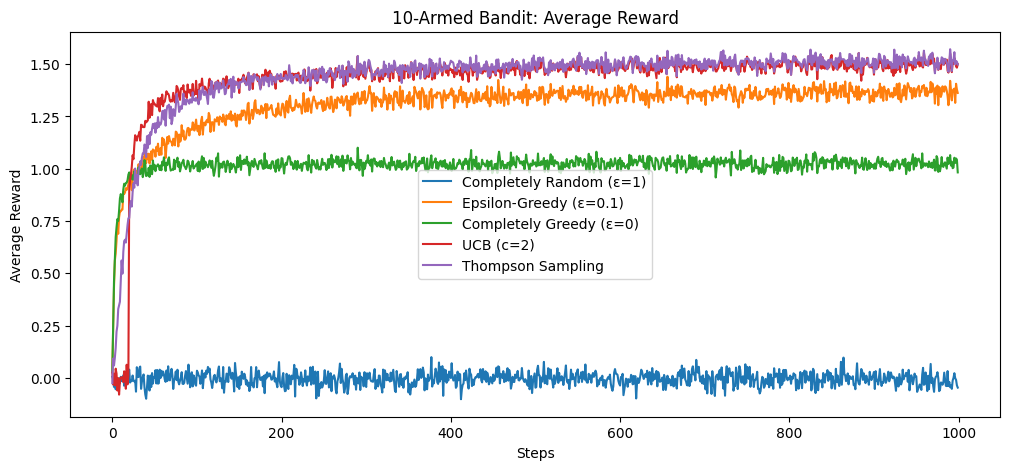

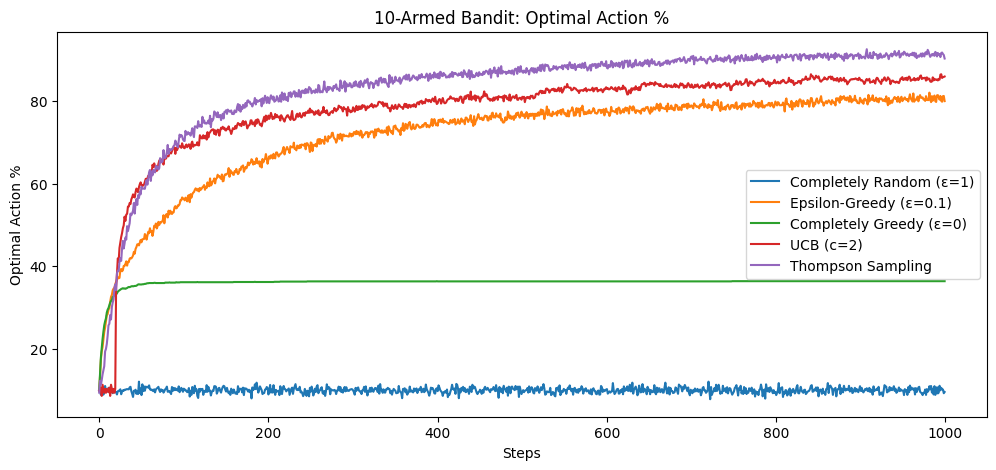

                     Agent  Avg MSE Optimal Action  Avg MSE Overall
0  Completely Random (ε=1)                0.010647         0.010140
1   Epsilon-Greedy (ε=0.1)                0.021696         0.085348
2  Completely Greedy (ε=0)                1.896253         0.852229
3                UCB (c=2)                0.047168         0.271332
4        Thompson Sampling                0.009034         0.129551


In [ ]:
# Run the experiment and plot results
plot_results(agents, Bandit(seed = 2025), steps=1000, runs=2000)